In [1]:
%matplotlib inline
import matplotlib
import numpy as np
from scipy.signal import square
import wave, math

from matplotlib import pyplot as plt

In [2]:
# Variables
sRate = 100e3 # sample rate in Hertz (10 MHz)
freq1 = 1e3 # frequency of first sine wave (1 MHz)
freq2 = 500 # frequency of square wave (1 MHz)
amplitude1 = 1 # amplitude of first wave
amplitude2 = 1 # amplitude of second wave
numPeriods = 10 # number of periods of the waves
numSamples = sRate * numPeriods # total number of samples

In [3]:
numSamples

1000000.0

In [4]:
# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

In [5]:
# Create the x axis from 0 to numPeriods, divided into numSamples samples.
x = np.linspace(0, int(numPeriods), int(numSamples))

In [6]:
x

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
len(x)

1000000

In [8]:
f1 = amplitude1*np.sin(freq1*2*np.pi*x)

In [9]:
# Generate the square wave with the same number of samples as the sine wave
# and an amplitude of 1 by providing an amplitude of 0.5 and then adding 0.5 
# to the result.
f2 = 0.5*amplitude2*square(freq2*2*np.pi*x)+0.5*amplitude2

In [10]:
fcomb = f1 * f2

In [11]:
len(fcomb)

1000000

In [12]:
np.ceil(max(f1))

1.0

(-1.0, 1.0)

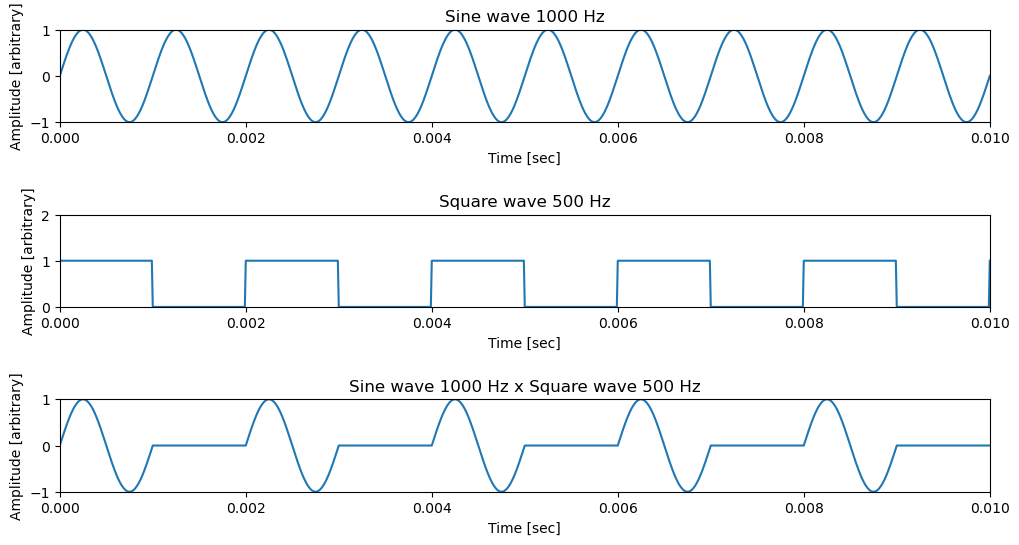

In [13]:
fig = plt.figure()
fig.set_size_inches(12,6)
plt.subplots_adjust(hspace=1)
t_final = 0.01 # seconds

plt.subplot(311)
plt.plot(x, f1)
plt.title('Sine wave {0:d} Hz'.format(int(freq1)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(np.floor(min(f1)), np.ceil(max(f1)))

plt.subplot(312)
plt.plot(x, f2)
plt.title('Square wave {0:d} Hz'.format(int(freq2)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(2*np.floor(min(f2)), 2*np.ceil(max(f2)))

plt.subplot(313)
plt.plot(x, fcomb)
plt.title('Sine wave {0:d} Hz x Square wave {1:d} Hz'.format(int(freq1), int(freq2)))
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude [arbitrary]')
plt.xlim(0, t_final)
plt.ylim(np.floor(min(fcomb)), np.ceil(max(fcomb)))

In [14]:
fft_output = np.fft.rfft(f1)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

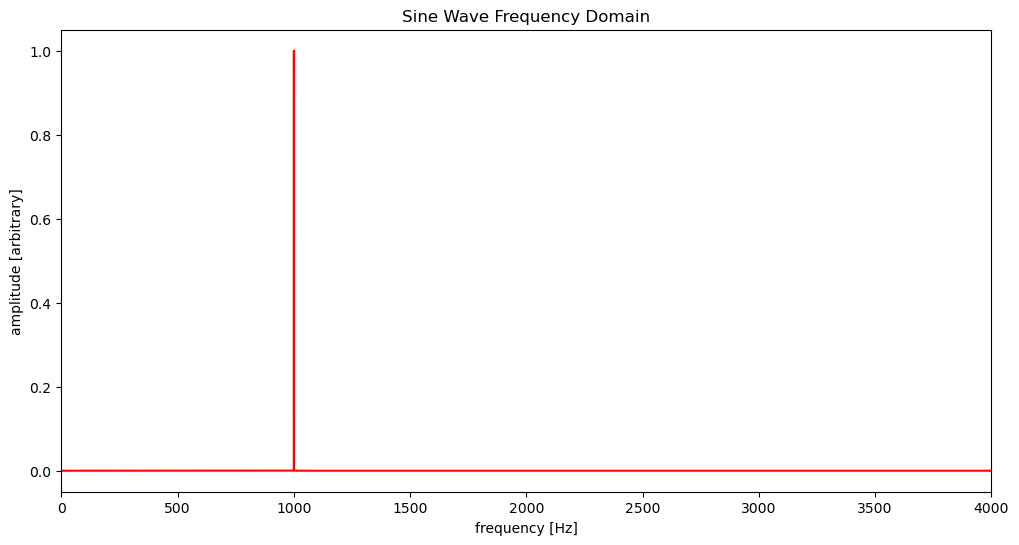

In [15]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Sine Wave Frequency Domain', fig_size=(12,6))
plt.xlim(0, 4000)
plt.plot(frequencies, magnitude, 'r')


In [16]:
fft_output = np.fft.rfft(f2)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

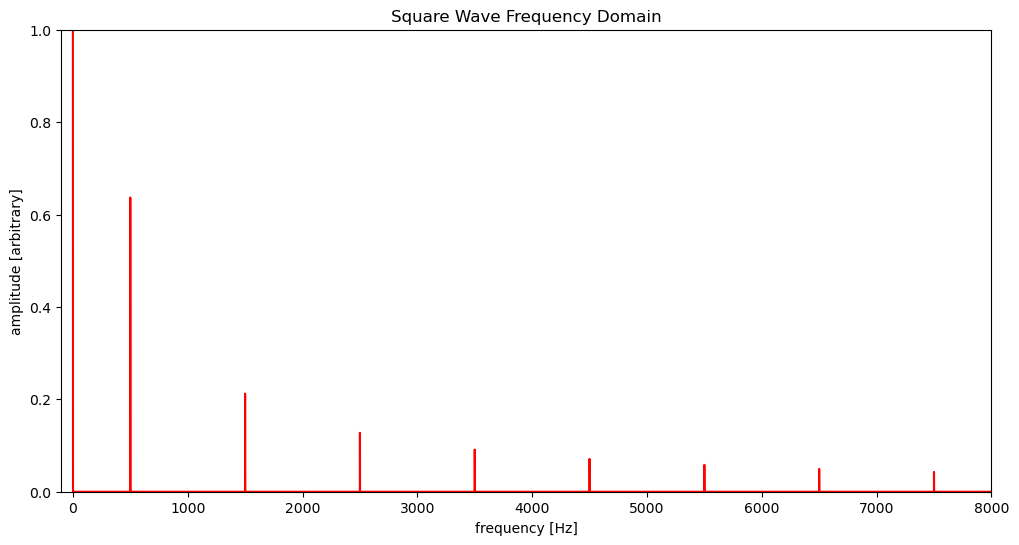

In [17]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Square Wave Frequency Domain', fig_size=(12,6))
plt.xlim(-100, 8000)
plt.ylim(0, 1)
plt.plot(frequencies, magnitude, 'r')


In [18]:
fft_output = np.fft.rfft(fcomb)
magnitude = [np.sqrt(i.real**2+i.imag**2)/len(fft_output) for i in fft_output]
frequencies = [(i*1.0/numSamples)*sRate for i in range(int(numSamples)//2+1)]

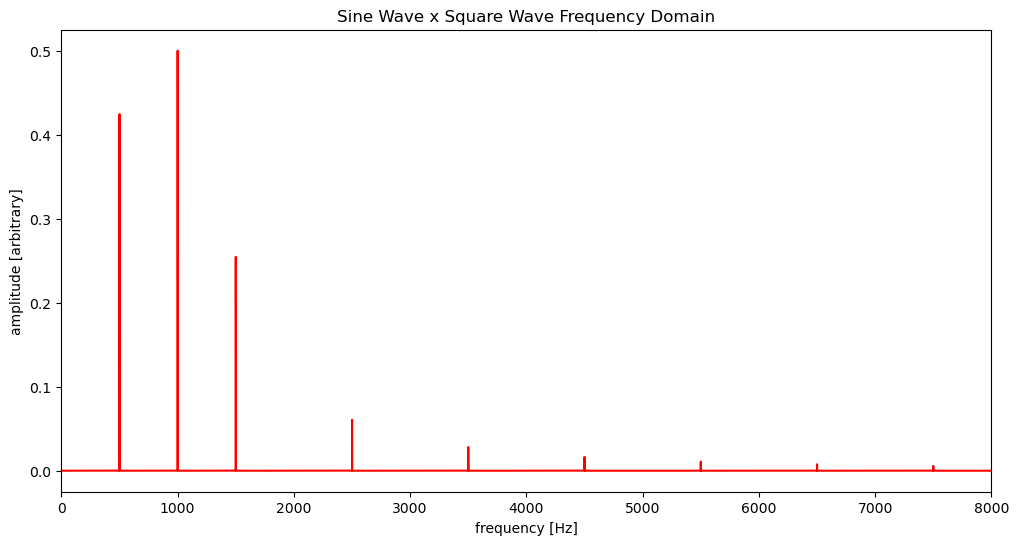

In [19]:
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Sine Wave x Square Wave Frequency Domain', fig_size=(12,6))
plt.xlim(0, 8000)
plt.plot(frequencies, magnitude, 'r')


In [20]:
len(fcomb)

1000000

In [21]:
len(magnitude)

500001

In [22]:
len(frequencies)

500001

In [23]:
print ('Opening data files...')
dataFile = open('sw_sine_1MHz.dat', 'wt')  # To be run through Fortran code. Has amplitudes only.
td_dataFile = open('sw_sine_1MHz_time_domain.dat', 'wt')  # Has time domain amplitude and time data
fd_dataFile = open('sw_sine_1MHz_freq_domain.dat', 'wt')  # Has freq domain amplitude and corrected FFT frequencies (bins)

print ('Writing data files...')
np.savetxt(dataFile, fcomb, fmt='%10.10f', delimiter=' ', newline='\n')
np.savetxt(td_dataFile, np.column_stack([fcomb, x]), fmt='%10.10f', newline='\n')
np.savetxt(fd_dataFile, np.column_stack([magnitude, frequencies]), fmt='%10.10f', newline='\n')

Opening data files...
Writing data files...


In [24]:
import os
exec_status = os.system("./dfft sw_sine_1MHz.dat DFFT_mag_file.dat DFFT_phase_file.dat 100000 10 > log.txt")

In [25]:
DFFT_mag_raw_data = np.loadtxt('DFFT_mag_file.dat')
DFFT_phase_raw_data = np.loadtxt('DFFT_phase_file.dat')

In [26]:
# Get the frequency bins
DFFT_freq_bins = [row[1] for row in DFFT_mag_raw_data]

In [27]:
# Get the magnitude data
DFFT_mag_data = [row[0] for row in DFFT_mag_raw_data]

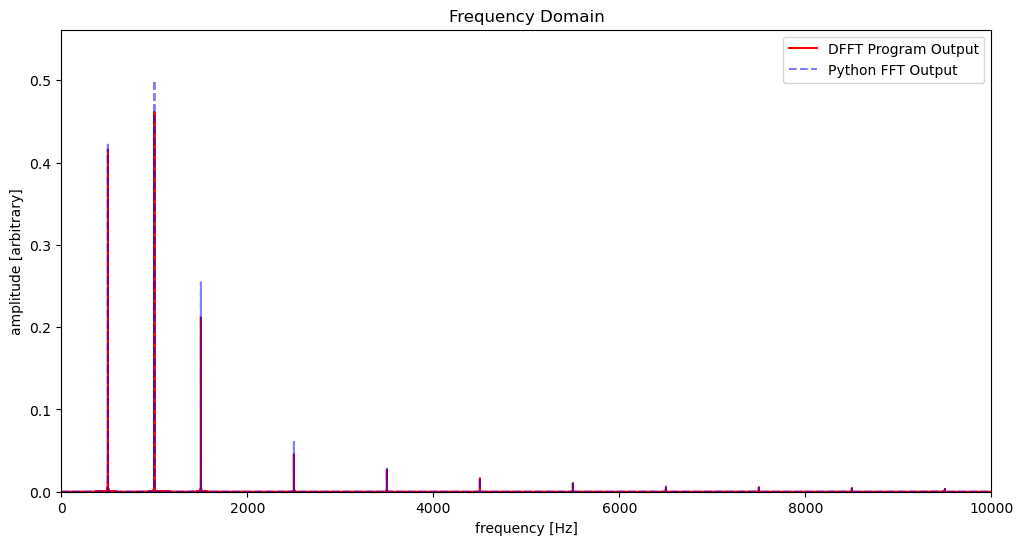

In [28]:
# Plot the magnitude data
setup_graph(x_label='frequency [Hz]', y_label='amplitude [arbitrary]', 
            title='Frequency Domain', fig_size=(12,6))
plt.plot(DFFT_freq_bins, DFFT_mag_data, 'r', label = 'DFFT Program Output')
plt.plot(frequencies, magnitude, linestyle='--', color='blue', alpha=0.5, label = 'Python FFT Output')
plt.legend()
plt.xlim(0, sRate/numPeriods)
plt.ylim(0, max(DFFT_mag_data)+0.1)
plt.show()